In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df_mve= pd.read_csv('IMDb Movies India.csv', encoding='unicode_escape')
print(df_mve.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [21]:
print(df_mve.shape)

(15509, 10)


In [22]:
print(df_mve.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [23]:
sum_nl=df_mve.isnull()
print(sum_nl.sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [24]:
print(df_mve.dropna(inplace=True))

None


In [25]:
sum_nu= df_mve.isnull()
print(sum_nu.sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\18966271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mve['Genre'],order=df_mve['Genre'].value_counts().index[:10], palette='vlag')


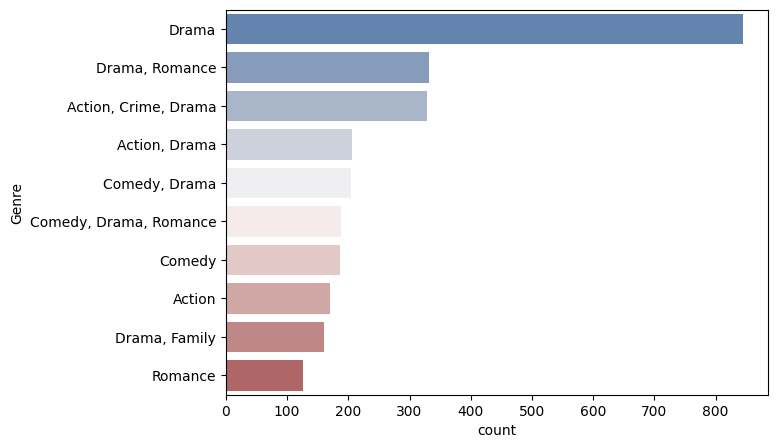

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\18966271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mve['Director'],order=df_mve['Director'].value_counts().index[:10],palette='summer')


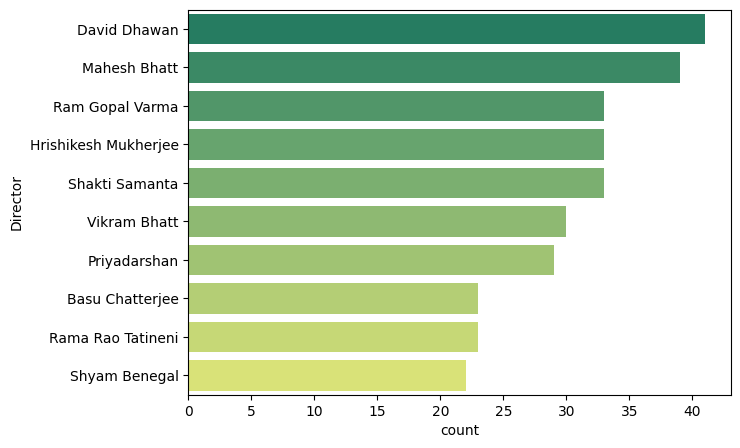

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\18966271.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mve['Actor 1'],order=df_mve['Actor 1'].value_counts().index[:10],palette='winter')


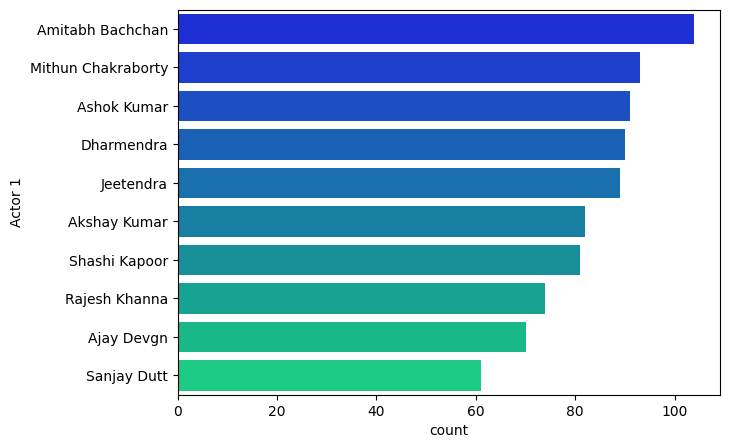

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\18966271.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mve['Actor 2'],order=df_mve['Actor 2'].value_counts().index[:10],palette='spring')


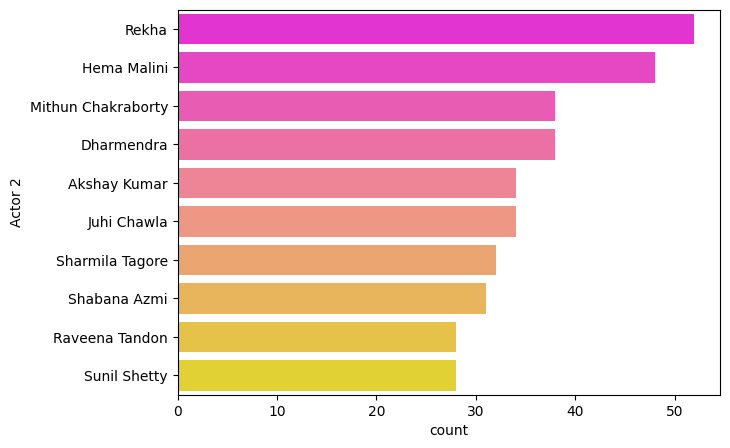

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\18966271.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mve['Actor 3'],order=df_mve['Actor 3'].value_counts().index[:10],palette='autumn')


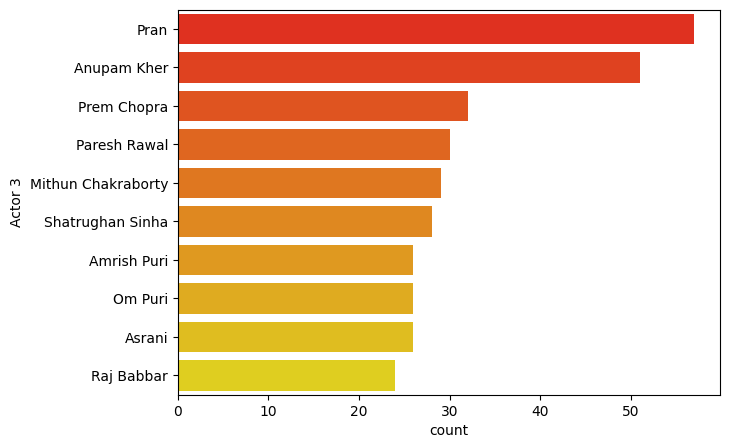

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(y=df_mve['Genre'],order=df_mve['Genre'].value_counts().index[:10], palette='vlag')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(y=df_mve['Director'],order=df_mve['Director'].value_counts().index[:10],palette='summer')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(y=df_mve['Actor 1'],order=df_mve['Actor 1'].value_counts().index[:10],palette='winter')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(y=df_mve['Actor 2'],order=df_mve['Actor 2'].value_counts().index[:10],palette='spring')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(y=df_mve['Actor 3'],order=df_mve['Actor 3'].value_counts().index[:10],palette='autumn')
plt.show()

In [27]:
df_mve['Year']= df_mve['Year'].str.replace('(','').str.replace(')','')
df_mve['Year']= pd.to_numeric(df_mve['Year'])

df_mve['Duration']= df_mve['Duration'].str.replace('min','').astype(float)
df_mve['Votes']= df_mve['Votes'].str.replace(',','').astype(int)

In [28]:
df_mve.drop('Name', axis = 1,inplace= True)

In [29]:
dfm= pd.get_dummies(df_mve, columns=['Director','Genre','Actor 1','Actor 2','Actor 3'])
dfm.head()

,Year,Duration,Rating,Votes,Director_A. Bhimsingh,Director_A. Jagannathan,Director_A. Majid,Director_A. Muthu,Director_A. Salaam,Director_A. Shamsheer,...,Actor 3_Zara Shah,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,2019,109.0,7.0,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019,110.0,4.4,35,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997,147.0,4.7,827,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2005,142.0,7.4,1086,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2012,82.0,5.6,326,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
X= dfm.drop('Rating', axis=1)
Y= dfm['Rating']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=45)
print(f"Training data shape:{X_train.shape}")
print(f"Testing data shape:{X_test.shape}")
print(f"Training data target shape:{Y_train.shape}")
print(f"Testing data target shape:{Y_test.shape}")

Training data shape:(4527, 9647)
Testing data shape:(1132, 9647)
Training data target shape:(4527,)
Testing data target shape:(1132,)


In [31]:
model= RandomForestRegressor(n_estimators=100, random_state=45)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=45)

In [32]:
y_pred= model.predict(X_test)

In [34]:
sqr= mean_squared_error(Y_test,y_pred)
rsqr= np.sqrt(mean_squared_error(Y_test,y_pred))
mae= mean_absolute_error(Y_test,y_pred)
r2= r2_score(Y_test, y_pred)

print(f"Mean squared Error: {sqr}")
print(f"Root Mean squared Error: {rsqr}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean squared Error: 1.2786851333922262
Root Mean squared Error: 1.130789606156789
Mean Absolute Error: 0.8209796819787986
R-squared: 0.31855932302533607


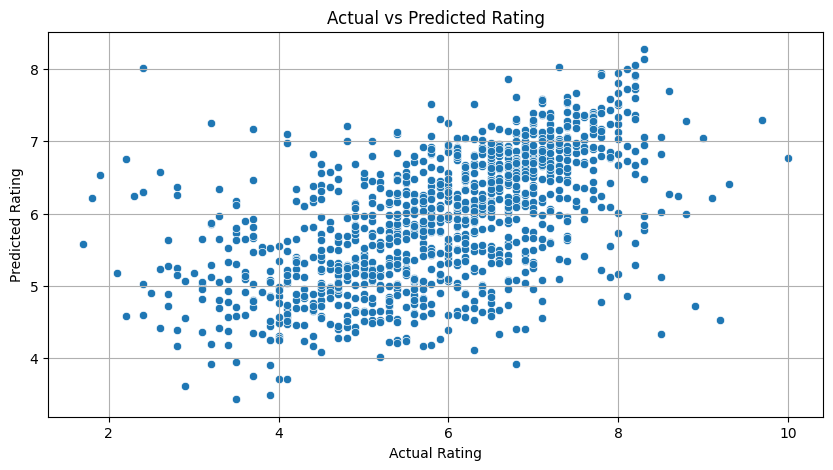

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= Y_test, y= y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.grid(True)
plt.show()

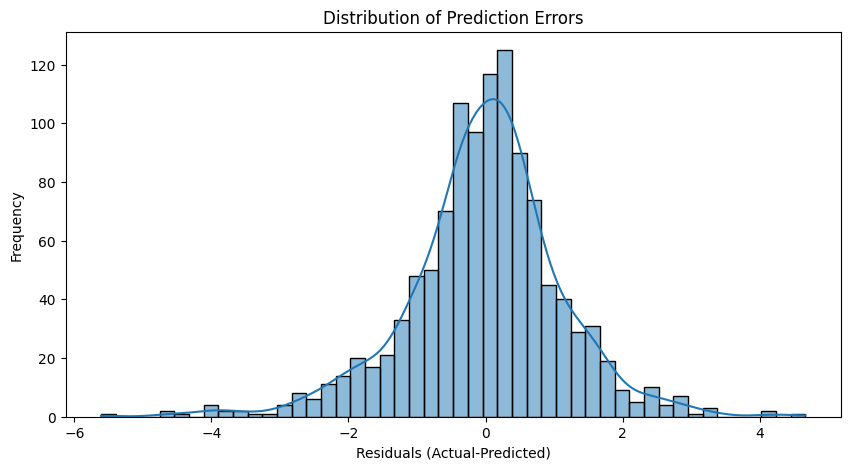

In [36]:
rsd = Y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(rsd, kde= True)
plt.xlabel('Residuals (Actual-Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

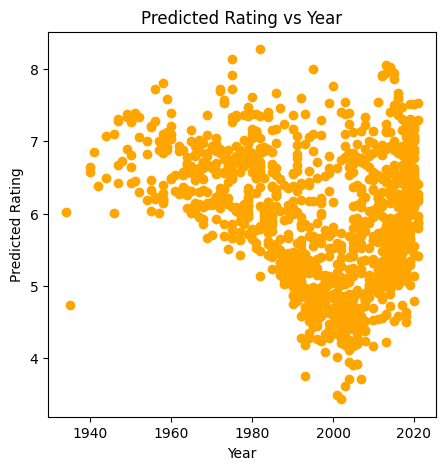

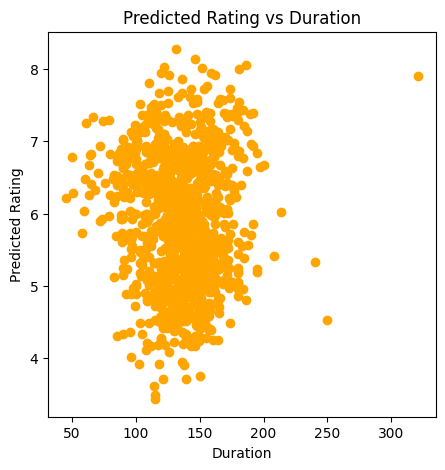

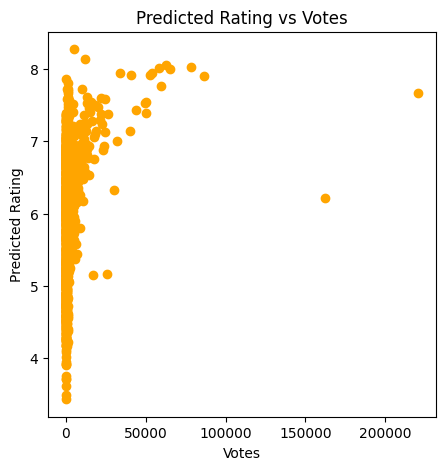

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3380459311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')


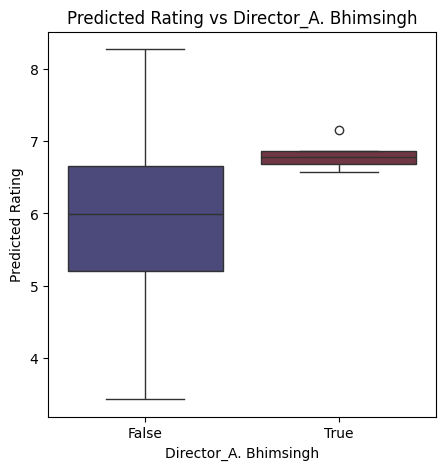

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3380459311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')


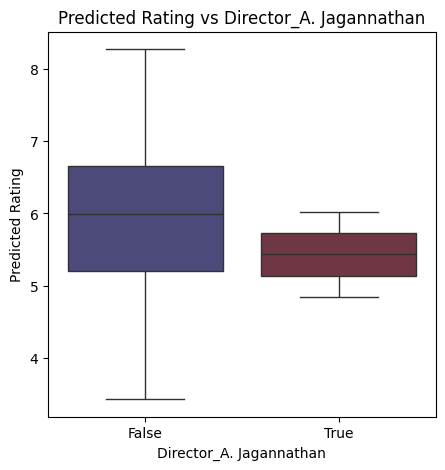

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3380459311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')


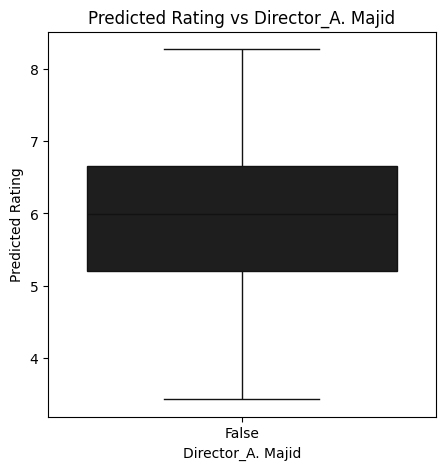

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3380459311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')


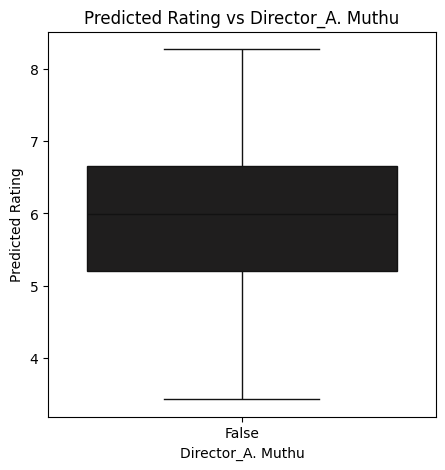

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3380459311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')


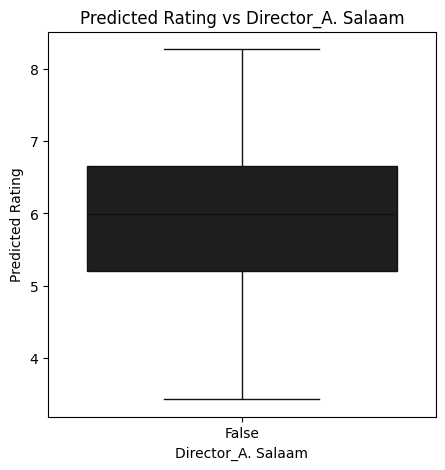

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3380459311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')


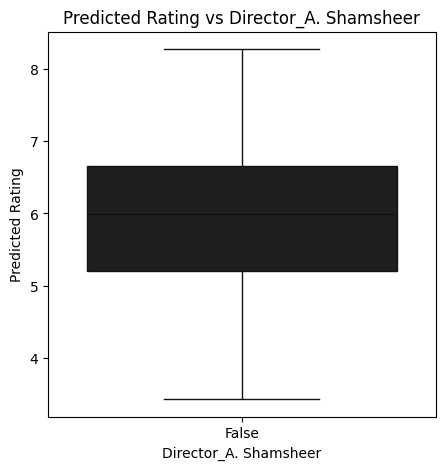

C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3380459311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')


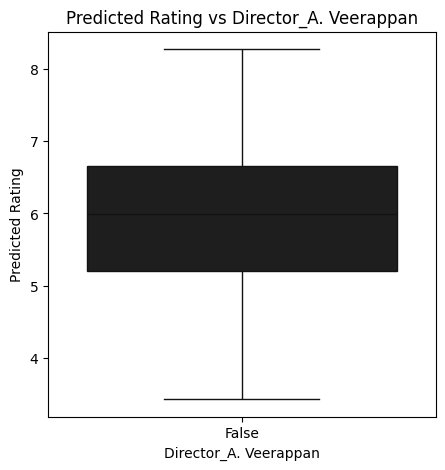

In [39]:
X_df= pd.DataFrame(X_test, columns=X_train.columns)
n_plot=min(10, len(X_df.columns))

for i in range(n_plot):
    column= X_df.columns[i]
    plt.figure(figsize=(5,5))
    plt.xlabel(column)
    plt.ylabel("Predicted Rating")
    plt.title(f"Predicted Rating vs {column}")

    if X_df[column].nunique()<=10:
        sns.boxplot(x=X_df[column], y= y_pred, palette='icefire')
    else:
        plt.scatter(x=X_df[column],y=y_pred, color='orange')
    plt.show()